### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import QTable, Table, Column
from astropy.io import ascii
from scipy.optimize import curve_fit

### Data

In [2]:
mangaHIall = Table.read('input/mangaHIall_nearestDistances.txt', format = 'ascii.commented_header')
# mangaHIall_walls = Table.read('input/mangaHIall_walls_corrected.txt', format = 'ascii.commented_header')
# mangaHIall_voids = Table.read('input/mangaHIall_voids_corrected.txt', format = 'ascii.commented_header')

In [3]:
mangaHIall['logNSA_Mstar'] = np.log10(mangaHIall['NSA_Mstar'])

In [4]:
walls_data_boolean = np.isfinite(mangaHIall['HI-walls'])  
mangaHIall_walls = mangaHIall[walls_data_boolean]

voids_data_boolean = np.isfinite(mangaHIall['HI-voids']) 
mangaHIall_voids = mangaHIall[voids_data_boolean]

### Linear function to fit

In [5]:
def f(x, m, b):
    return m*x + b

In [6]:
def linear_bestfit(data, typeOfMass, xdata):

    if xdata == 'all':  
        
        boolean_walls = np.isfinite(data[typeOfMass + '-' + 'walls'])
        boolean_voids = np.isfinite(data[typeOfMass + '-' + 'voids'])
        boolean = np.logical_or(boolean_walls, boolean_voids)
       
        xdata_src = typeOfMass
        
    else: 
        
        xdata_src = typeOfMass + '-' + xdata
        boolean = np.isfinite(data[xdata_src])
    
    xdata = np.log10(data[xdata_src][boolean])
    ydata = np.log10(data['WF50_corrected'][boolean])
    
    popt, pcov = curve_fit(f, xdata, ydata)  
    m_bf, b_bf = popt
    m_err, b_err = np.sqrt(np.diag(pcov))
    
    m_bf_2 = round(m_bf, 2)
    b_bf_2 = round(b_bf, 2)
    
    m_err_2 = round(m_err, 2)
    b_err_2 = round(b_err, 2) 
   
    ydata_line = m_bf * xdata + b_bf
    
    print('Best-fit line equation for ' + xdata_src + ' galaxies given by the equation: log(WF50 velocity) = ' + str(m_bf_2) + '+/-' + str(m_err_2) + 'log(' + typeOfMass + ') + ' + str(b_bf_2) + '+/-' + str(b_err_2))    
    
    return ydata_line

In [7]:
def linear_bestfit_norm(data, typeOfMass, xdata):

    if xdata == 'all':  
        
        boolean_walls = np.isfinite(data[typeOfMass + '-' + 'walls'])
        boolean_voids = np.isfinite(data[typeOfMass + '-' + 'voids'])
        boolean = np.logical_or(boolean_walls, boolean_voids)
       
        xdata_src = typeOfMass
        
    else: 
        
        xdata_src = typeOfMass + '-' + xdata
        boolean = np.isfinite(data[xdata_src])
    
    xdata = np.log10(data[xdata_src][boolean])
    ydata = np.log10(data['WF50_to_MTot-norm'][boolean])
    
    popt, pcov = curve_fit(f, xdata, ydata)  
    m_bf, b_bf = popt
    m_err, b_err = np.sqrt(np.diag(pcov))
    
    m_bf_2 = round(m_bf, 2)
    b_bf_2 = round(b_bf, 2)
    
    m_err_2 = round(m_err, 2)
    b_err_2 = round(b_err, 2) 
   
    ydata_line = m_bf * xdata + b_bf
    
    print('Best-fit line equation for ' + xdata_src + ' galaxies given by the equation: log(MTot/Mstar) = ' + str(m_bf_2) + '+/-' + str(m_err_2) + 'log(' + typeOfMass + ') + ' + str(b_bf_2) + '+/-' + str(b_err_2))    
    
    return ydata_line

---

### Scatter plots and fits

##### WF50 vs MStar

In [8]:
ydata_Mstar_walls = np.log10(mangaHIall_walls['WF50_corrected'])
ydata_Mstar_voids = np.log10(mangaHIall_voids['WF50_corrected'])
ydata_Mstar_all = np.log10(mangaHIall['WF50_corrected'])

xdata_Mstar_walls = np.log10(mangaHIall_walls['NSA_Mstar-walls'])
xdata_Mstar_voids = np.log10(mangaHIall_voids['NSA_Mstar-voids'])
xdata_Mstar_all = np.log10(mangaHIall['NSA_Mstar'])

In [9]:
ydata_Mstar_walls_line = linear_bestfit(mangaHIall, 'NSA_Mstar','walls')
ydata_Mstar_voids_line = linear_bestfit(mangaHIall,'NSA_Mstar', 'voids')
ydata_Mstar_all_line = linear_bestfit(mangaHIall,'NSA_Mstar', 'all')

Best-fit line equation for NSA_Mstar-walls galaxies given by the equation: log(WF50 velocity) = 0.21+/-0.02log(NSA_Mstar) + 0.31+/-0.22
Best-fit line equation for NSA_Mstar-voids galaxies given by the equation: log(WF50 velocity) = 0.2+/-0.03log(NSA_Mstar) + 0.45+/-0.27
Best-fit line equation for NSA_Mstar galaxies given by the equation: log(WF50 velocity) = 0.21+/-0.02log(NSA_Mstar) + 0.33+/-0.17


In [10]:
ydata_Mstar_normalized_MTot_walls = (mangaHIall_walls['WF50_to_MTot-norm'])
ydata_Mstar_normalized_MTot_voids = (mangaHIall_voids['WF50_to_MTot-norm'])
ydata_Mstar_normalized_MTot_all = (mangaHIall['WF50_to_MTot-norm'])

In [11]:
ydata_Mstar_normalized_MTot_walls_line = linear_bestfit_norm(mangaHIall, 'NSA_Mstar','walls')
ydata_Mstar_normalized_MTot_voids_line = linear_bestfit_norm(mangaHIall,'NSA_Mstar', 'voids')
ydata_Mstar_normalized_MTot_all_line = linear_bestfit_norm(mangaHIall,'NSA_Mstar', 'all')

Best-fit line equation for NSA_Mstar-walls galaxies given by the equation: log(MTot/Mstar) = -0.57+/-0.04log(NSA_Mstar) + 7.29+/-0.43
Best-fit line equation for NSA_Mstar-voids galaxies given by the equation: log(MTot/Mstar) = -0.6+/-0.06log(NSA_Mstar) + 7.56+/-0.53
Best-fit line equation for NSA_Mstar galaxies given by the equation: log(MTot/Mstar) = -0.58+/-0.03log(NSA_Mstar) + 7.34+/-0.33


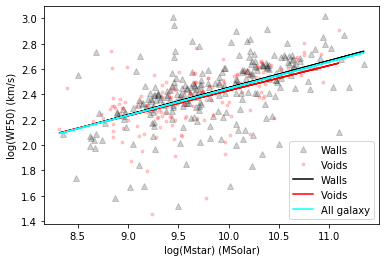

In [12]:
#Best-fit line equation for NSA_Mstar-walls galaxies given by the equation: log(W.WF50 velocity) = 0.21+/-0.02log(NSA_Mstar) + 0.31+/-0.22
#Best-fit line equation for NSA_Mstar-voids galaxies given by the equation: log(V.WF50 velocity) = 0.2+/-0.03log(NSA_Mstar) + 0.45+/-0.27
#Best-fit line equation for NSA_Mstar galaxies given by the equation: log(WF50 velocity) = 0.21+/-0.02log(NSA_Mstar) + 0.33+/-0.17

plt.plot(xdata_Mstar_walls, ydata_Mstar_walls , '^', label = 'Walls', color = 'black', alpha = 0.18)
plt.plot(xdata_Mstar_voids, ydata_Mstar_voids  , '.', label = 'Voids', color = 'red', alpha = 0.18)
plt.plot(xdata_Mstar_walls, ydata_Mstar_walls_line , '-', color = 'black', label = 'Walls')
plt.plot(xdata_Mstar_voids, ydata_Mstar_voids_line , '-', color = 'red', label = 'Voids')
plt.plot(xdata_Mstar_all, ydata_Mstar_all_line, '-', color = 'cyan', label = 'All galaxy')
plt.ylabel('log(WF50) (km/s)')
plt.xlabel('log(Mstar) (MSolar)')
plt.legend()
plt.savefig('plots/logWF50_corrected-logMstar_bestFit.svg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='svg', pad_inches=0.1)
plt.savefig('plots/logWF50_corrected-logMstar_bestFit.jpeg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='jpeg', pad_inches=0.1)

plt.show()

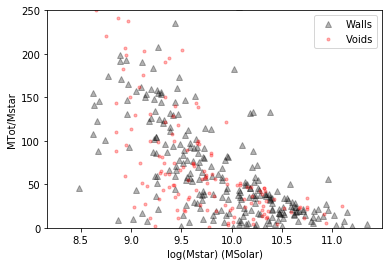

In [13]:
# Best-fit line equation for NSA_Mstar-walls galaxies given by the equation: log(MTot/Mstar) = -0.57+/-0.04log(NSA_Mstar) + 7.29+/-0.43
# Best-fit line equation for NSA_Mstar-voids galaxies given by the equation: log(MTot/Mstar) = -0.6+/-0.06log(NSA_Mstar) + 7.56+/-0.53
# Best-fit line equation for NSA_Mstar galaxies given by the equation: log(MTot/Mstar) = -0.58+/-0.03log(NSA_Mstar) + 7.34+/-0.33

plt.plot(xdata_Mstar_walls, ydata_Mstar_normalized_MTot_walls , '^', label = 'Walls', color = 'black', alpha = 0.3)
plt.plot(xdata_Mstar_voids, ydata_Mstar_normalized_MTot_voids  , '.', label = 'Voids', color = 'red', alpha = 0.3)
#plt.plot(xdata_Mstar_walls, ydata_Mstar_normalized_MTot_walls_line , '-', color = 'black', label = 'Walls')
#plt.plot(xdata_Mstar_voids, ydata_Mstar_normalized_MTot_voids_line , '-', color = 'red', label = 'Voids')
#plt.plot(xdata_Mstar_all, ydata_Mstar_normalized_MTot_all_line, '-', color = 'cyan', label = 'All galaxy')
plt.ylabel('MTot/Mstar')
plt.xlabel('log(Mstar) (MSolar)')
plt.ylim(ymax = 250, ymin = 0)
plt.legend()
plt.savefig('plots/log(MTot_by_Mstar)-logMstar_bestFit.svg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='svg', pad_inches=0.1)
plt.savefig('plots/log(MTot_by_Mstar)-logMstar_bestFit.jpeg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='jpeg', pad_inches=0.1)

plt.show()


##### WF50 vs HI

In [14]:
# Masking outlier points
mangaVoids_plot_boolean = np.log10(mangaHIall_voids['HI-voids']) >= 8.6
mangaVoids_plot = mangaHIall_voids[mangaVoids_plot_boolean]

In [15]:
ydata_HI_walls = np.log10(mangaHIall_walls['WF50_corrected'])
ydata_HI_voids = np.log10(mangaVoids_plot['WF50_corrected'])
ydata_HI_all = np.log10(mangaHIall['WF50_corrected'])

xdata_HI_walls = np.log10(mangaHIall_walls['HI-walls'])
xdata_HI_voids = np.log10(mangaVoids_plot['HI-voids'])
xdata_HI_all = np.log10(mangaHIall['HI'])

In [16]:
ydata_HI_walls_line = linear_bestfit(mangaHIall, 'HI','walls')
ydata_HI_voids_line = linear_bestfit(mangaVoids_plot,'HI', 'voids')
ydata_HI_all_line = linear_bestfit(mangaHIall,'HI', 'all')

Best-fit line equation for HI-walls galaxies given by the equation: log(WF50 velocity) = 0.35+/-0.04log(HI) + -1.03+/-0.38
Best-fit line equation for HI-voids galaxies given by the equation: log(WF50 velocity) = 0.27+/-0.05log(HI) + -0.25+/-0.45
Best-fit line equation for HI galaxies given by the equation: log(WF50 velocity) = 0.28+/-0.03log(HI) + -0.36+/-0.28


In [17]:
ydata_HI_normalized_MTot_walls = (mangaHIall_walls['WF50_to_MTot-norm'])
ydata_HI_normalized_MTot_voids = (mangaVoids_plot['WF50_to_MTot-norm'])
ydata_HI_normalized_MTot_all = (mangaHIall['WF50_to_MTot-norm'])

In [18]:
ydata_HI_walls_normalized_MTot_line = linear_bestfit_norm(mangaHIall, 'HI','walls')
ydata_HI_voids_normalized_MTot_line = linear_bestfit_norm(mangaVoids_plot,'HI', 'voids')
ydata_HI_all_normalized_MTot_line = linear_bestfit_norm(mangaHIall,'HI', 'all')

Best-fit line equation for HI-walls galaxies given by the equation: log(MTot/Mstar) = -0.35+/-0.1log(HI) + 5.06+/-0.94
Best-fit line equation for HI-voids galaxies given by the equation: log(MTot/Mstar) = -0.46+/-0.11log(HI) + 6.19+/-1.11
Best-fit line equation for HI galaxies given by the equation: log(MTot/Mstar) = -0.35+/-0.07log(HI) + 5.09+/-0.67


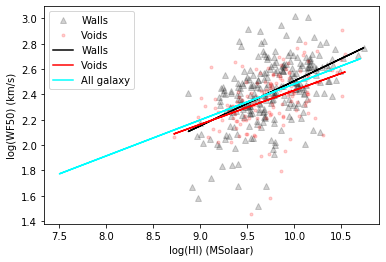

In [19]:
# Best-fit line equation for HI-walls galaxies given by the equation: log(W.WF50 velocity) = 0.35+/-0.04log(HI) + -1.03+/-0.38
# Best-fit line equation for HI-voids galaxies given by the equation: log(V.WF50 velocity) = 0.27+/-0.05log(HI) + -0.25+/-0.45
# Best-fit line equation for HI galaxies given by the equation: log(WF50 velocity) = 0.28+/-0.03log(HI) + -0.36+/-0.28

plt.plot(xdata_HI_walls, ydata_HI_walls , '^', label = 'Walls', color = 'black', alpha = 0.18)
plt.plot(xdata_HI_voids, ydata_HI_voids  , '.', label = 'Voids', color = 'red', alpha = 0.18)
plt.plot(xdata_HI_walls, ydata_HI_walls_line , '-', color = 'black', label = 'Walls')
plt.plot(xdata_HI_voids, ydata_HI_voids_line , '-', color = 'red', label = 'Voids')
plt.plot(xdata_HI_all, ydata_HI_all_line, '-', color = 'cyan', label = 'All galaxy')
plt.ylabel('log(WF50) (km/s)')
plt.xlabel('log(HI) (MSolaar)')
plt.legend()
plt.savefig('plots/logWF50_corrected-logHI_bestFit.svg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='svg', pad_inches=0.1)
plt.savefig('plots/logWF50_corrected-logHI_bestFit.jpeg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='jpeg', pad_inches=0.1)

plt.show()

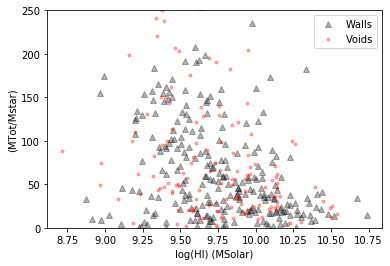

In [20]:
# Best-fit line equation for HI-walls galaxies given by the equation: log(MTot/Mstar) = -0.35+/-0.1log(HI) + 5.06+/-0.94
# Best-fit line equation for HI-voids galaxies given by the equation: log(MTot/Mstar) = -0.46+/-0.11log(HI) + 6.19+/-1.11
# Best-fit line equation for HI galaxies given by the equation: log(MTot/Mstar) = -0.35+/-0.07log(HI) + 5.09+/-0.67


plt.plot(xdata_HI_walls, ydata_HI_normalized_MTot_walls , '^', label = 'Walls', color = 'black', alpha = 0.3)
plt.plot(xdata_HI_voids, ydata_HI_normalized_MTot_voids  , '.', label = 'Voids', color = 'red', alpha = 0.3)
#plt.plot(xdata_HI_walls, ydata_HI_walls_normalized_MTot_line , '-', color = 'black', label = 'Walls')
#plt.plot(xdata_HI_voids, ydata_HI_voids_normalized_MTot_line , '-', color = 'red', label = 'Voids')
#plt.plot(xdata_HI_all, ydata_HI_all_normalized_MTot_line, '-', color = 'cyan', label = 'All galaxy')
plt.ylabel('(MTot/Mstar)')
plt.xlabel('log(HI) (MSolar)')
plt.ylim((0,250))
plt.legend()
plt.savefig('plots/log(MTot_by_Mstar)-logHI_bestFit.svg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='svg', pad_inches=0.1)
plt.savefig('plots/log(MTot_by_Mstar)-logHI_bestFit.jpeg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='jpeg', pad_inches=0.1)

plt.show()


##### WF50 vs (NSA_Mstar + HI)

In [21]:
mangaHIall['MHI_Mstar'] = np.NaN * np.ones(len(mangaHIall), dtype = np.float64)
mangaHIall['MHI_Mstar-walls'] = np.NaN * np.ones(len(mangaHIall), dtype = np.float64)
mangaHIall['MHI_Mstar-voids'] = np.NaN * np.ones(len(mangaHIall), dtype = np.float64)

mangaHIall['MHI_Mstar'] = mangaHIall['HI_corrected'] + mangaHIall['NSA_Mstar']
mangaHIall['MHI_Mstar-walls'] = mangaHIall['HI-walls'] + mangaHIall['NSA_Mstar-walls']
mangaHIall['MHI_Mstar-voids'] = mangaHIall['HI-voids'] + mangaHIall['NSA_Mstar-voids']

mangaHIall.write('input/mangaHIall_classified_corrected_with_Mstar+MHI', format = 'ascii.commented_header', overwrite = True)

In [22]:
MHI_Mstar_walls_boolean = np.isfinite(mangaHIall['MHI_Mstar-walls'])
mangaHIall_walls = mangaHIall[MHI_Mstar_walls_boolean]
mangaHIall_walls.remove_column('MHI_Mstar-voids')

mangaHIall_walls.write('input/mangaHIall_walls_corrected_with_Mstar+MHI.txt', format = 'ascii.commented_header',
                      overwrite = True)

In [23]:
MHI_Mstar_voids_boolean = np.isfinite(mangaHIall['MHI_Mstar-voids'])
mangaHIall_voids = mangaHIall[MHI_Mstar_voids_boolean]
mangaHIall_voids.remove_column('MHI_Mstar-walls')

mangaHIall_voids.write('input/mangaHIall_voids_corrected_with_Mstar+MHI.txt', format = 'ascii.commented_header', 
                      overwrite = True)

In [24]:
ydata_Mstar_HI_walls = np.log10(mangaHIall_walls['WF50_corrected'])
ydata_Mstar_HI_voids = np.log10(mangaHIall_voids['WF50_corrected'])
ydata_Mstar_HI_all = np.log10(mangaHIall['WF50_corrected'])

xdata_Mstar_HI_walls = np.log10(mangaHIall_walls['MHI_Mstar-walls'])
xdata_Mstar_HI_voids = np.log10(mangaHIall_voids['MHI_Mstar-voids'])
xdata_Mstar_HI_all = np.log10(mangaHIall['MHI_Mstar'])

In [25]:
ydata_Mstar_HI_walls_line = linear_bestfit(mangaHIall, 'MHI_Mstar','walls')
ydata_Mstar_HI_voids_line = linear_bestfit(mangaHIall,'MHI_Mstar', 'voids')
ydata_Mstar_HI_all_line = linear_bestfit(mangaHIall,'MHI_Mstar', 'all')

Best-fit line equation for MHI_Mstar-walls galaxies given by the equation: log(WF50 velocity) = 0.31+/-0.03log(MHI_Mstar) + -0.73+/-0.29
Best-fit line equation for MHI_Mstar-voids galaxies given by the equation: log(WF50 velocity) = 0.29+/-0.04log(MHI_Mstar) + -0.56+/-0.36
Best-fit line equation for MHI_Mstar galaxies given by the equation: log(WF50 velocity) = 0.31+/-0.02log(MHI_Mstar) + -0.7+/-0.22


In [26]:
ydata_Mstar_HI_normalized_MTot_walls = (mangaHIall_walls['WF50_to_MTot-norm'])
ydata_Mstar_HI_normalized_MTot_voids = (mangaHIall_voids['WF50_to_MTot-norm'])
ydata_Mstar_HI_normalized_MTot_all = (mangaHIall['WF50_to_MTot-norm'])

In [27]:
ydata_Mstar_HI_normalized_MTot_walls_line = linear_bestfit_norm(mangaHIall, 'MHI_Mstar','walls')
ydata_Mstar_HI_normalized_MTot_voids_line = linear_bestfit_norm(mangaHIall,'MHI_Mstar', 'voids')
ydata_Mstar_HI_normalized_MTot_all_line = linear_bestfit_norm(mangaHIall,'MHI_Mstar', 'all')

Best-fit line equation for MHI_Mstar-walls galaxies given by the equation: log(MTot/Mstar) = -0.67+/-0.06log(MHI_Mstar) + 8.45+/-0.65
Best-fit line equation for MHI_Mstar-voids galaxies given by the equation: log(MTot/Mstar) = -0.64+/-0.08log(MHI_Mstar) + 8.19+/-0.84
Best-fit line equation for MHI_Mstar galaxies given by the equation: log(MTot/Mstar) = -0.66+/-0.05log(MHI_Mstar) + 8.36+/-0.51


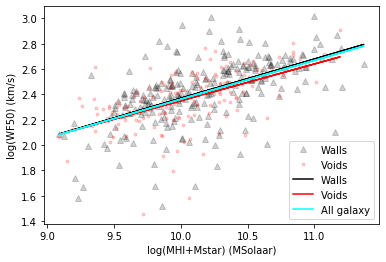

In [28]:
# Best-fit line equation for MHI_Mstar-walls galaxies given by the equation: log(WF50 velocity) = 0.31+/-0.03log(MHI_Mstar) + -0.73+/-0.29
# Best-fit line equation for MHI_Mstar-voids galaxies given by the equation: log(WF50 velocity) = 0.29+/-0.04log(MHI_Mstar) + -0.56+/-0.36
# Best-fit line equation for MHI_Mstar galaxies given by the equation: log(WF50 velocity) = 0.31+/-0.02log(MHI_Mstar) + -0.7+/-0.22

plt.plot(xdata_Mstar_HI_walls, ydata_Mstar_HI_walls , '^', label = 'Walls', color = 'black', alpha = 0.18)
plt.plot(xdata_Mstar_HI_voids, ydata_Mstar_HI_voids  , '.', label = 'Voids', color = 'red', alpha = 0.18)
plt.plot(xdata_Mstar_HI_walls, ydata_Mstar_HI_walls_line , '-', color = 'black', label = 'Walls')
plt.plot(xdata_Mstar_HI_voids, ydata_Mstar_HI_voids_line , '-', color = 'red', label = 'Voids')
plt.plot(xdata_Mstar_HI_all, ydata_Mstar_HI_all_line, '-', color = 'cyan', label = 'All galaxy')
plt.ylabel('log(WF50) (km/s)')
plt.xlabel('log(MHI+Mstar) (MSolaar)')
plt.legend()
plt.savefig('plots/logWF50_corrected-logMHI_MSTAR_bestFit.svg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='svg', pad_inches=0.1)
plt.savefig('plots/logWF50_corrected-logMHI_MSTAR_bestFit.jpeg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='jpeg', pad_inches=0.1)

plt.show()


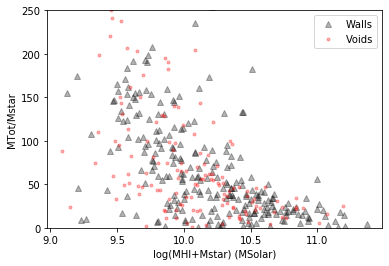

In [29]:
# Best-fit line equation for MHI_Mstar-walls galaxies given by the equation: log(MTot/Mstar) = -0.67+/-0.06log(MHI_Mstar) + 8.45+/-0.65
# Best-fit line equation for MHI_Mstar-voids galaxies given by the equation: log(MTot/Mstar) = -0.64+/-0.08log(MHI_Mstar) + 8.19+/-0.84
# Best-fit line equation for MHI_Mstar galaxies given by the equation: log(MTot/Mstar) = -0.66+/-0.05log(MHI_Mstar) + 8.36+/-0.51


plt.plot(xdata_Mstar_HI_walls, ydata_Mstar_HI_normalized_MTot_walls , '^', label = 'Walls', color = 'black', alpha = 0.3)
plt.plot(xdata_Mstar_HI_voids, ydata_Mstar_HI_normalized_MTot_voids  , '.', label = 'Voids', color = 'red', alpha = 0.3)
#plt.plot(xdata_Mstar_HI_walls, ydata_Mstar_HI_normalized_MTot_walls_line , '-', color = 'black', label = 'Walls')
#plt.plot(xdata_Mstar_HI_voids, ydata_Mstar_HI_normalized_MTot_voids_line , '-', color = 'red', label = 'Voids')
#plt.plot(xdata_Mstar_HI_all, ydata_Mstar_HI_normalized_MTot_all_line, '-', color = 'cyan', label = 'All galaxy')
plt.ylabel('MTot/Mstar')
plt.xlabel('log(MHI+Mstar) (MSolar)')
plt.ylim((0,250))
plt.legend()
plt.savefig('plots/log(MTot_by_Mstar)-logMHI_MSTAR_bestFit.svg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='svg', pad_inches=0.1)
plt.savefig('plots/log(MTot_by_Mstar)-logMHI_MSTAR_bestFit.jpeg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='jpeg', pad_inches=0.1)

plt.show()


---

### Median plots and fits

In [30]:
mangaHIall

MaNGA_plate,MaNGA_IFU,NSA_plate,NSA_fiberID,NSA_MJD,NSA_index,NSA_RA,NSA_DEC,NSA_ba,NSA_phi,NSA_redshift,NSA_Mstar,vflag,avg_v_max,avg_v_max_sigma,avg_alpha,avg_alpha_sigma,avg_chi_square_rot,pos_v_max,pos_v_max_sigma,pos_alpha,pos_alpha_sigma,pos_chi_square_rot,neg_v_max,neg_v_max_sigma,neg_alpha,neg_alpha_sigma,neg_chi_square_rot,center_flux,center_flux_error,Mtot,Mtot_error,Mdark,Mdark_error,Mstar,Mdark_Mstar_ratio,Mdark_Mstar_ratio_error,rabsmag,avg_r_turn,avg_r_turn_sigma,pos_r_turn,pos_r_turn_sigma,neg_r_turn,neg_r_turn_sigma,logNO,t3,BPT,curve_used,points_cut,avg_chi_square_ndf,pos_chi_square_ndf,neg_chi_square_ndf,index,Z12logOH,u_r,frac_masked_spaxels,Rmax,Mtot_Mstar_ratio,Mtot_Mstar_ratio_error,smoothness_score,CMD_class,Mstar_turn,SFR,sSFR,pos_Vmax_data,avg_Vmax_data,neg_Vmax_data,WF50,WP20,logHI,HI,NSA_Mstar-walls,NSA_Mstar-voids,HI-walls,HI-voids,HI_corrected,SNR,Inc_Angle,WF50_corrected,WP20_corrected,logSNR,MHI_Mstar,MHI_Mstar-walls,MHI_Mstar-voids,x,y,z,d_nn,radius,d_nvc,d_nvc_norm,flag,d_nve,WF50_to_MTot,WF50_to_MTot-norm,logNSA_Mstar
int32,int32,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64
8465,1901,1281,231,52753,247928,197.44581468983537,48.899591403437014,0.7684928178787231,18.52703857421875,0.028888285160064697,15041360896.0,0.0,694.1065598029447,64.28960377376522,169.88497626173015,1.7327077246997473e-05,15.217068463480258,670.7653939526836,15.960128227576048,6.971553117105116,3.3409887210988973,16.662168571733133,1824.214984439412,1128158.8728166134,10.139927187019886,342203353.66120255,562.2702918190502,0.2404831498861313,0.00282066542648091,235168173081.6036,43563538091.837006,212601943793.92502,43563538091.837006,22566229287.678577,9.421243623984985,1.9304748496738533,-19.729339599609375,1.543808157566983,0.16833871490329255,0.7834103370121185,0.04388640897002279,12.055743708240605,7457.1345332868905,-99.0,-99.0,2.0,-99,0,7.608534231740129,8.331084285866567,281.1351459095251,892095,9.46977439171353,2.427546977996826,0.07550335570469799,2.0993620223274516,10.421243623984985,1.9304748496738533,2.5540066976945326,3,-1.0,-1.0557212829589844,-11.407499313354492,835.9509258900858,705.7810819757563,-10.044590650342819,236.0,268.0,9.34000015258789,2187762392.612301,15041360896.0,nan,2257997075.0769553,nan,2257997075.0769553,4.300000190734863,0.7116085078210765,340.85168913966817,388.4765245535311,0.6334684748435625,17299357971.076954,17299357971.076954,nan,-54.35114534553452,-17.08035669799775,65.30705620452258,1.2387897185381238,10.871529789357965,18.246340712821784,1.6783599977514618,420,8.654785017837883,540444155623.8603,35.93053576472475,10.177287131660222
8249,3702,899,202,52620,164473,137.03265262994884,45.92096195150727,0.4280976951122284,47.86474609375,0.02679748833179474,4316812800.0,0.0,470.17155751503515,1764.5963567538108,0.9114709790034429,1.632624280324924,1.0792643567173899,34.92250964449018,1.714344719842902,137.1392992341442,579174444.6396726,3.3911074849327174,242.99019897544017,3887704333.4850802,171.2340152243181,0.0,26.156873020790904,0.08108656108379364,0.00201356164064311,180170543139.84866,1352392670031.6855,165985843226.1657,1352392670031.6855,14184699913.682957,11.701752186244782,95.34164827323065,-18.68962860107422,13.156762781102165,45.537164179135054,1.3032636040779486,0.18480939543790068,5.718307576497

In [31]:
walls_MTot_norm_boolean = np.logical_and(mangaHIall_walls['WF50_to_MTot-norm'] > 0, mangaHIall_walls['WF50_to_MTot-norm'] <= 250)  
walls_data_MTot_norm = mangaHIall_walls[walls_MTot_norm_boolean]

voids_MTot_norm_boolean = np.logical_and(mangaHIall_voids['WF50_to_MTot-norm'] > 0, mangaHIall_voids['WF50_to_MTot-norm'] <= 250)  
voids_data_MTot_norm = mangaHIall_voids[voids_MTot_norm_boolean]

In [32]:
def round_down(x):
    rounded_x = round(x)
    if rounded_x > x: # 9.6 -> 10, so ans is 9.5 [9.6,9.7] [9.5,9.6]
        x = rounded_x - 0.5
    elif rounded_x < x: # 9.4 -> 9, so ans is 9
        x = rounded_x
    return x

def round_up(x):
    rounded_x = round(x)
    if rounded_x > x: # 9.6 -> 10, so ans is 10
        x = rounded_x 
    elif rounded_x < x: # 9.4 -> 9, so ans is 9.5
        x = rounded_x + 0.5
    return x

In [33]:
def bin_MTot_norm(data, mass_bins, massType):
    MTot_norm_bins = []
    for _ in range(len(mass_bins)):
        MTot_norm_bins.append([])
    #  loop through bins:
    #     find which row the mass is in
    #     add wf50 to corresponding bin from corresponding row
    
    
    for mass_bin in mass_bins:
        for mass in mass_bin:
            for i in range(len(data)):
                if mass == data[massType][i]:
                    MTot_norm_bins[mass_bins.index(mass_bin)].append((data['WF50_to_MTot-norm'][i]))
    
    return MTot_norm_bins

In [34]:
def bin_midpoints(lower, upper, bin_size):
    
    bin_num = int((upper - lower)/bin_size)
    midpoints = []
    for i in range(bin_num):
        midpoints.append(lower + bin_size*(i + 0.5))
        # for every bin: midpoint = lower_bound_ofthatbin + bin_size/2
        # lower_bound_ofthatbin = lowest_bound + bin# * bin_size
        
    return midpoints

In [35]:
def bin_correction(l, d):
    empty = []
    ind = []
    e = []
    if d is not empty:
        for i in range(len(l)):
            if l[i] == -999.0:
                ind.append(i)

        for i in range(len(d)):
            if i in ind:
                continue
            else:
                e.append(d[i])

    while -999.0 in l:
        bin_num = l.index(-999.0)
        l.remove(-999.0)

    return l, e

##### WF50 vs MStar

##### MTot/MStar vs MStar

In [51]:
def bin_mstar(data, lower, upper):
    """
    fn: bin_mass()
    description: Returns a binned data structure according to log(mass)
    
    parameters:
        data: table of data, astropy table
        lower: min log(mass), float64
        upper: max log(mass), float64
        galaxyType: 'Voids'/'Walls', string
    
    return:
        bins: data structure containing binned data. bins is a list of lists. Each sublist corresponds
              to a bin.
    """
    bin_size = 0.5
   
    bins = []
    num_bins = int((upper - lower)/bin_size)
    for i in range(num_bins):
        bins.append([]) #generates empty sublists inside the list bins
    
    for i in range(len(data)):
            mass = (data['logNSA_Mstar'][i])
            bin_num = int((mass - lower)//bin_size) # which bin to put into
            bins[bin_num].append(mass) # adds to corresponding bin
     
    return bins
            

In [52]:
walls_lower_mstar = round_down(min(walls_data_MTot_norm['logNSA_Mstar']))
walls_upper_mstar = round_up(max(walls_data_MTot_norm['logNSA_Mstar']))

voids_lower_mstar = round_down(min(voids_data_MTot_norm['logNSA_Mstar']))
voids_upper_mstar = round_up(max(voids_data_MTot_norm['logNSA_Mstar']))

In [54]:
walls_mstar_bins = bin_mstar(walls_data_MTot_norm, walls_lower_mstar, walls_upper_mstar)

voids_mstar_bins = bin_mstar(voids_data_MTot_norm, voids_lower_mstar, voids_upper_mstar)

In [55]:
def bin_Mtot_mstar(data, mass_bins):
    Mtot_bins = []
    for _ in range(len(mass_bins)):
        Mtot_bins.append([])
    #  loop through bins:
    #     find which row the mass is in
    #     add wf50 to corresponding bin from corresponding row
    
    
    for mass_bin in mass_bins:
        for mass in mass_bin:
            for i in range(len(data)):
                if mass == data['logNSA_Mstar'][i]:
                    Mtot_bins[mass_bins.index(mass_bin)].append((data['WF50_to_MTot-norm'][i]))
    
    return Mtot_bins

In [56]:
walls_Mtot_mstar_bins = bin_Mtot_mstar(walls_data_MTot_norm, walls_mstar_bins)

voids_Mtot_mstar_bins = bin_Mtot_mstar(voids_data_MTot_norm, voids_mstar_bins)

In [57]:
def bin_midpoints(lower, upper, bin_size):
    
    bin_num = int((upper - lower)/bin_size)
    midpoints = []
    for i in range(bin_num):
        midpoints.append(lower + bin_size*(i + 0.5))
        # for every bin: midpoint = lower_bound_ofthatbin + bin_size/2
        # lower_bound_ofthatbin = lowest_bound + bin# * bin_size
        
    return midpoints

In [58]:
def bin_correction(l, d):
    empty = []
    ind = []
    e = []
    if d is not empty:
        for i in range(len(l)):
            if l[i] == -999.0:
                ind.append(i)

        for i in range(len(d)):
            if i in ind:
                continue
            else:
                e.append(d[i])

    while -999.0 in l:
        bin_num = l.index(-999.0)
        l.remove(-999.0)

    return l, e

In [59]:
walls_center_mstar = bin_midpoints(walls_lower_mstar, walls_upper_mstar, 0.5)
walls_center_mstar_err = 0.25

walls_Mtot_mstar_bins_medians = []
walls_Mtot_mstar_bins_medians_err = []

for Mtot_mstar_bin in walls_Mtot_mstar_bins:
    if len(Mtot_mstar_bin) < 2:
        walls_Mtot_mstar_bins_medians.append(-999.0)
        walls_Mtot_mstar_bins_medians_err.append(-999.0)
    else:
        walls_Mtot_mstar_bins_medians.append(np.median(Mtot_mstar_bin))
        walls_Mtot_mstar_bins_medians_err.append(1/np.sqrt(len(Mtot_mstar_bin)))

walls_Mtot_mstar_bins_medians, walls_center_mstar = bin_correction(walls_Mtot_mstar_bins_medians, walls_center_mstar)
walls_Mtot_mstar_bins_medians_err, _ = bin_correction(walls_Mtot_mstar_bins_medians_err, [])
#walls_center_mstar = walls_center_mstar[:5]

#############################################

voids_center_mstar = bin_midpoints(voids_lower_mstar, voids_upper_mstar, 0.5)
voids_center_mstar_err = 0.25

voids_Mtot_mstar_bins_medians = []
voids_Mtot_mstar_bins_medians_err = []

for Mtot_mstar_bin in voids_Mtot_mstar_bins:
    if len(Mtot_mstar_bin) < 2:
        voids_Mtot_mstar_bins_medians.append(-999.0)
        voids_Mtot_mstar_bins_medians_err.append(-999.0)
    else:
        voids_Mtot_mstar_bins_medians.append(np.median(Mtot_mstar_bin))
        voids_Mtot_mstar_bins_medians_err.append(1/np.sqrt(len(Mtot_mstar_bin)))

voids_Mtot_mstar_bins_medians, voids_center_mstar = bin_correction(voids_Mtot_mstar_bins_medians, voids_center_mstar)
voids_Mtot_mstar_bins_medians_err, _ = bin_correction(voids_Mtot_mstar_bins_medians_err, [])
#voids_center_mstar = voids_center_mstar[:6]

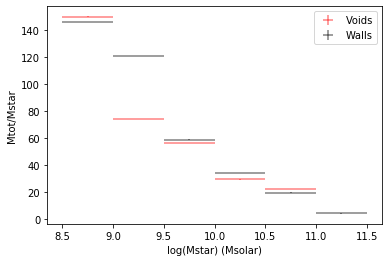

In [62]:
plt.errorbar(voids_center_mstar, voids_Mtot_mstar_bins_medians, xerr = voids_center_mstar_err, yerr = voids_Mtot_mstar_bins_medians_err, fmt ='none', color = 'red', alpha = 0.5, label = 'Voids')
plt.errorbar(walls_center_mstar, walls_Mtot_mstar_bins_medians, xerr = walls_center_mstar_err, yerr = walls_Mtot_mstar_bins_medians_err, fmt ='none', color = 'black', alpha = 0.5, label = 'Walls')
#plt.plot(x_data_voids_MTotal_median, y_data_voids_MTotal_median_line, '-r*', label = 'Voids')
#plt.plot(x_data_walls_MTotal_median, y_data_walls_MTotal_median_line, '->', color = 'black', label = 'Walls')
#plt.plot(x_data_MTotal_median, y_data_MTotal_median_line, '-^', color = 'green', label = 'ALL')
plt.xlabel('log(Mstar) (Msolar)')
plt.ylabel('Mtot/Mstar')
plt.legend()

plt.show()

##### HI

In [76]:
def bin_mHI(data, lower, upper):
    """
    fn: bin_mass()
    description: Returns a binned data structure according to log(mass)
    
    parameters:
        data: table of data, astropy table
        lower: min log(mass), float64
        upper: max log(mass), float64
        galaxyType: 'Voids'/'Walls', string
    
    return:
        bins: data structure containing binned data. bins is a list of lists. Each sublist corresponds
              to a bin.
    """
    bin_size = 0.5
   
    bins = []
    num_bins = int((upper - lower)/bin_size)
    for i in range(num_bins):
        bins.append([]) #generates empty sublists inside the list bins
    
    for i in range(len(data)):
            mass = (data['logHI'][i])
            bin_num = int((mass - lower)//bin_size) # which bin to put into
            bins[bin_num].append(mass) # adds to corresponding bin
     
    return bins
            

In [81]:
def bin_Mtot_mhi(data, mass_bins):
    Mtot_bins = []
    for _ in range(len(mass_bins)):
        Mtot_bins.append([])
    #  loop through bins:
    #     find which row the mass is in
    #     add wf50 to corresponding bin from corresponding row
    
    
    for mass_bin in mass_bins:
        for mass in mass_bin:
            for i in range(len(data)):
                if mass == data['logHI'][i]:
                    Mtot_bins[mass_bins.index(mass_bin)].append((data['WF50_to_MTot-norm'][i]))
    
    return Mtot_bins

In [82]:
walls_lower_mHI = round_down(min(walls_data_MTot_norm['logHI']))
walls_upper_mHI = round_up(max(walls_data_MTot_norm['logHI']))

voids_lower_mHI = round_down(min(voids_data_MTot_norm['logHI']))
voids_upper_mHI = round_up(max(voids_data_MTot_norm['logHI']))


In [83]:
print(voids_upper_mHI)

10.5


In [84]:
walls_mHI_bins = bin_mHI(walls_data_MTot_norm, walls_lower_mHI, walls_upper_mHI)

voids_mHI_bins = bin_mHI(voids_data_MTot_norm, voids_lower_mHI, voids_upper_mHI)

In [85]:
walls_Mtot_mHI_bins = bin_Mtot_mhi(walls_data_MTot_norm, walls_mHI_bins)

voids_Mtot_mHI_bins = bin_Mtot_mhi(voids_data_MTot_norm, voids_mHI_bins)

In [86]:
walls_center_mHI = bin_midpoints(walls_lower_mHI, walls_upper_mHI, 0.5)
walls_center_mHI_err = 0.25

walls_Mtot_mHI_bins_medians = []
walls_Mtot_mHI_bins_medians_err = []

for Mtot_mHI_bin in walls_Mtot_mHI_bins:
    if len(Mtot_mHI_bin) < 2:
        walls_Mtot_mHI_bins_medians.append(-999.0)
        walls_Mtot_mHI_bins_medians_err.append(-999.0)
    else:
        walls_Mtot_mHI_bins_medians.append(np.median(Mtot_mHI_bin))
        walls_Mtot_mHI_bins_medians_err.append(1/np.sqrt(len(Mtot_mHI_bin)))

walls_Mtot_mHI_bins_medians, walls_center_mHI = bin_correction(walls_Mtot_mHI_bins_medians, walls_center_mHI)
walls_Mtot_mHI_bins_medians_err, _ = bin_correction(walls_Mtot_mHI_bins_medians_err, [])
#walls_center_mHI = walls_center_mHI[:5]

#############################################

voids_center_mHI = bin_midpoints(voids_lower_mHI, voids_upper_mHI, 0.5)
voids_center_mHI_err = 0.25

voids_Mtot_mHI_bins_medians = []
voids_Mtot_mHI_bins_medians_err = []

for Mtot_mHI_bin in voids_Mtot_mHI_bins:
    if len(Mtot_mHI_bin) < 2:
        voids_Mtot_mHI_bins_medians.append(-999.0)
        voids_Mtot_mHI_bins_medians_err.append(-999.0)
    else:
        voids_Mtot_mHI_bins_medians.append(np.median(Mtot_mHI_bin))
        voids_Mtot_mHI_bins_medians_err.append(1/np.sqrt(len(Mtot_mHI_bin)))

voids_Mtot_mHI_bins_medians, voids_center_mHI = bin_correction(voids_Mtot_mHI_bins_medians, voids_center_mHI)
voids_Mtot_mHI_bins_medians_err, _ = bin_correction(voids_Mtot_mHI_bins_medians_err, [])
#voids_center_mHI = voids_center_mHI[:6]


In [87]:
print(walls_center_mHI)

[8.75, 9.25, 9.75, 10.25, 10.75]


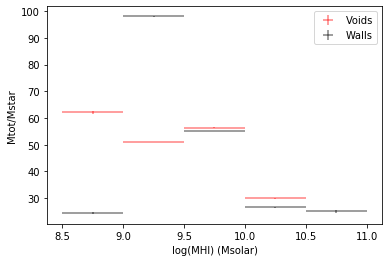

In [89]:
plt.errorbar(voids_center_mHI, voids_Mtot_mHI_bins_medians, xerr = voids_center_mHI_err, yerr = voids_Mtot_mHI_bins_medians_err, fmt ='none', color = 'red', alpha = 0.5, label = 'Voids')
plt.errorbar(walls_center_mHI, walls_Mtot_mHI_bins_medians, xerr = walls_center_mHI_err, yerr = walls_Mtot_mHI_bins_medians_err, fmt ='none', color = 'black', alpha = 0.5, label = 'Walls')
#plt.plot(x_data_voids_MTotal_median, y_data_voids_MTotal_median_line, '-r*', label = 'Voids')
#plt.plot(x_data_walls_MTotal_median, y_data_walls_MTotal_median_line, '->', color = 'black', label = 'Walls')
#plt.plot(x_data_MTotal_median, y_data_MTotal_median_line, '-^', color = 'green', label = 'ALL')
plt.xlabel('log(MHI) (Msolar)')
plt.ylabel('Mtot/Mstar')
plt.legend()

plt.show()
